# 
Convolutional Neural Network (CNN)

Convolutional Neural Networks (CNNs) are a class of deep neural networks commonly used in image recognition and processing. When discussing CNNs, several key terms and concepts come into play:

    Convolutional Layer: This layer applies convolutional operations to the input, producing feature maps. It is the core building block of a CNN.
        Convolutional Operation: This operation involves a kernel (or filter) that is passed over the input data, performing element-wise multiplication with the part of the input it is currently focused on. The result is a single value in the output feature map.



# Image Classification

In [34]:
# fmnist dataset for image classification
# import libraries

import tensorflow as tf
import numpy as np


In [35]:
import matplotlib.pyplot as plt

In [36]:
# load the dataset fmnist
df=tf.keras.datasets.fashion_mnist.load_data()

In [37]:
# seprate training images and test images
(train_images, train_labels),(test_images, test_labels) =df


In [38]:
# shape of each dataset
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)

print(test_labels.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [39]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

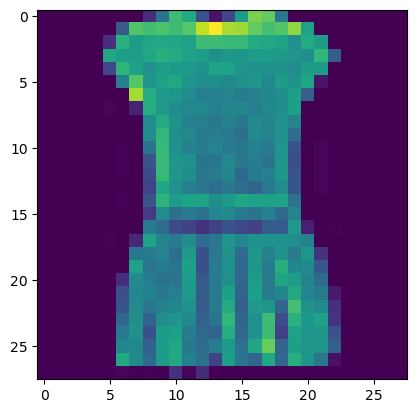

In [40]:
plt.imshow(train_images[3])

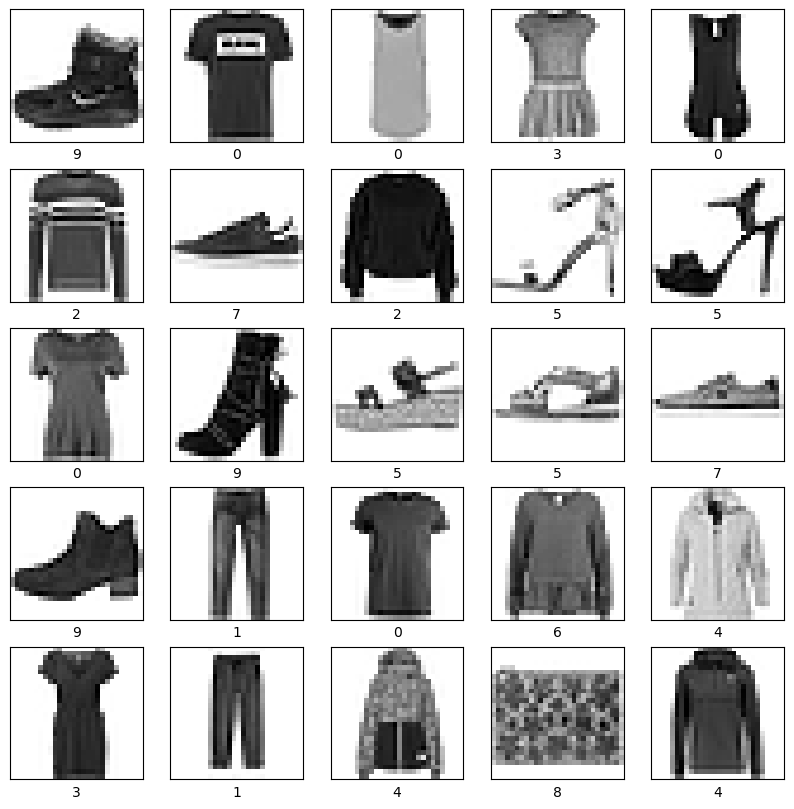

In [41]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

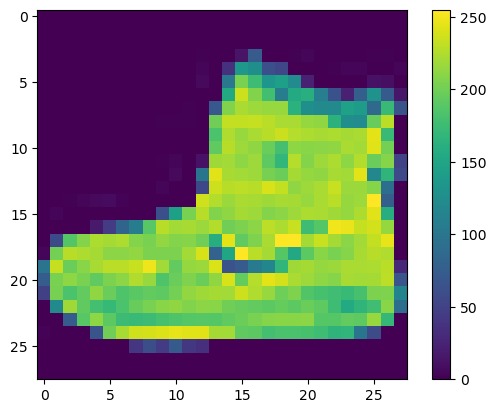

In [42]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [43]:
# Display the values of each pixel in the image
print("Pixel values")
for row in train_images[0]:
    for pixel in row:
        print("{:3}".format(pixel), end='')  
    print()  # This ensures a new line after each row


Pixel values
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0 13 73  0  0  1  4  0  0  0  0  1  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  3  0 36136127 62 54  0  0  0  1  3  4  0  0  3
  0  0  0  0  0  0  0  0  0  0  0  0  6  0102204176134144123 23  0  0  0  0 12 10  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0155236207178107156161109 64 23 77130 72 15
  0  0  0  0  0  0  0  0  0  0  0  1  0 69207223218216216163127121122146141 88172 66
  0  0  0  0  0  0  0  0  0  1  1  1  0200232232233229223223215213164127123196229  0
  0  0  0  0  0  0  0  0  0  0  0  0  0183225216223228235227224222224221223245173  0
  0  0  0  0  0  0  0  0  0  0  0  0  0193228218213198180212210211213223220243202  0
  0  0  0  0  0  0  0  0  0  1  3  0 122192202122181

In [44]:
import numpy as np

# Normalize train images
train_images = train_images / 255.0
train_images = np.round(train_images.astype(float), 3)

# Normalize test images
test_images = test_images / 255.0
test_images = np.round(test_images.astype(float), 3)



In [45]:
# Display the values of each pixel in the image
print("Pixel values")
for row in train_images[0]:
    for pixel in row:
        print("{:3}".format(pixel), end='')  
    print()  # This ensures a new line after each row


Pixel values
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.0040.00.00.0510.2860.00.00.0040.0160.00.00.00.00.0040.0040.0
0.00.00.00.00.00.00.00.00.00.00.00.00.0120.00.1410.5330.4980.2430.2120.00.00.00.0040.0120.0160.00.00.012
0.00.00.00.00.00.00.00.00.00.00.00.00.0240.00.40.80.690.5250.5650.4820.090.00.00.00.00.0470.0390.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.6080.9250.8120.6980.420.6120.6310.4270.2510.090.3020.510.2820.059
0.00.00.00.00.00.00.00.00.00.00.00.0040.00.2710.8120.8750.8550.8470.8470.6390.4980.4750.4780.5730.5530.3450.6750.259
0.00.00.00.00.00.00.00.00.00.0040.0040.0040.00.7840.910.910.9140.8980.8750.8750.8430.8350.6430.4980.4820.7690.8980.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.7180.8820.8470.8750.8940.9220.890.8780.8710.

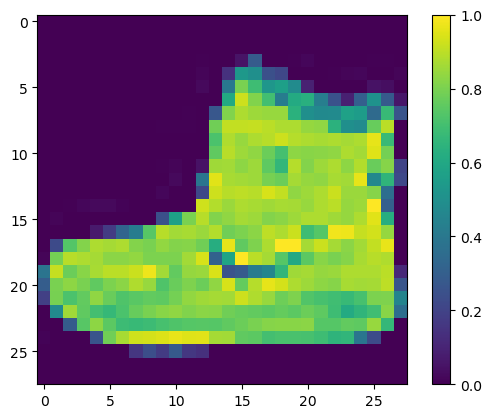

In [46]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [47]:
# reshape dimensions
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)


In [53]:
# create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),  # Input layer: Accepts grayscale images of size 28x28 with 1 channel.
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),  # Convolutional layer: Extracts 32 features using 3x3 filters.
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer: Reduces spatial dimensions by 2x2 pooling.
    tf.keras.layers.Flatten(),  # Flatten layer: Converts 2D feature maps to a 1D vector.
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer: Predicts probabilities for 10 classes using softmax.
])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Input layer: 28x28 grayscale images (shape can be adjusted based on dataset)
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),  # First convolutional layer with 10 filters and 3x3 kernel
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),  # Second convolutional layer with 10 filters and 3x3 kernel
    layers.MaxPooling2D(),  # First max pooling layer: Reduces spatial dimensions
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),  # Third convolutional layer with 10 filters and 3x3 kernel
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),  # Fourth convolutional layer with 10 filters and 3x3 kernel
    layers.MaxPooling2D(),  # Second max pooling layer: Reduces spatial dimensions
    
    layers.Flatten(),  # Flatten layer: Converts the 2D matrix to a 1D vector
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes), softmax for classification
])

# Compile the model
model.compile(optimizer='adam',  # Adam optimizer for training the model
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Metrics to track during training

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6642 - loss: 0.9134 - val_accuracy: 0.8277 - val_loss: 0.4754
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8338 - loss: 0.4516 - val_accuracy: 0.8360 - val_loss: 0.4375
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8516 - loss: 0.4026 - val_accuracy: 0.8585 - val_loss: 0.3955
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8628 - loss: 0.3781 - val_accuracy: 0.8629 - val_loss: 0.3796
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8743 - loss: 0.3460 - val_accuracy: 0.8672 - val_loss: 0.3617
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8786 - loss: 0.3372 - val_accuracy: 0.8685 - val_loss: 0.3530
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8813 - loss: 0.3259 - val_accuracy: 0.8815 - val_loss: 0.3232
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8864 -

In [64]:
# model evaluation on test_images and labels
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
# print both

print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

Test accuracy: 0.8852999806404114
Test loss: 0.3291904032230377


In [65]:
# save the model
model.save('model.h5')  # save the model to a file named 'model.h5

# Make Predictions



In [67]:
predictions=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [70]:
test_labels[0]

9

In [68]:
predictions[0]

array([2.6278332e-08, 2.8532437e-11, 3.6029448e-08, 9.3598480e-12,
       9.6647645e-10, 3.2589439e-02, 1.4044821e-07, 1.2276783e-02,
       1.2770125e-05, 9.5512080e-01], dtype=float32)

In [69]:
np.argmax(predictions[0])

9

Confusion Matrix:
[[796   1  20  26   2   1 146   0   8   0]
 [  0 975   0  16   2   0   6   0   1   0]
 [  8   0 831   7  51   0 101   0   2   0]
 [ 10   6   9 910  14   0  51   0   0   0]
 [  1   1  68  46 761   0 120   0   3   0]
 [  0   0   0   0   0 973   1  14   0  12]
 [100   4  56  23  62   0 749   0   5   1]
 [  0   0   0   0   0  16   0 963   0  21]
 [  7   0   2   7   4   7  27   3 942   1]
 [  0   0   0   0   0   5   0  41   1 953]]


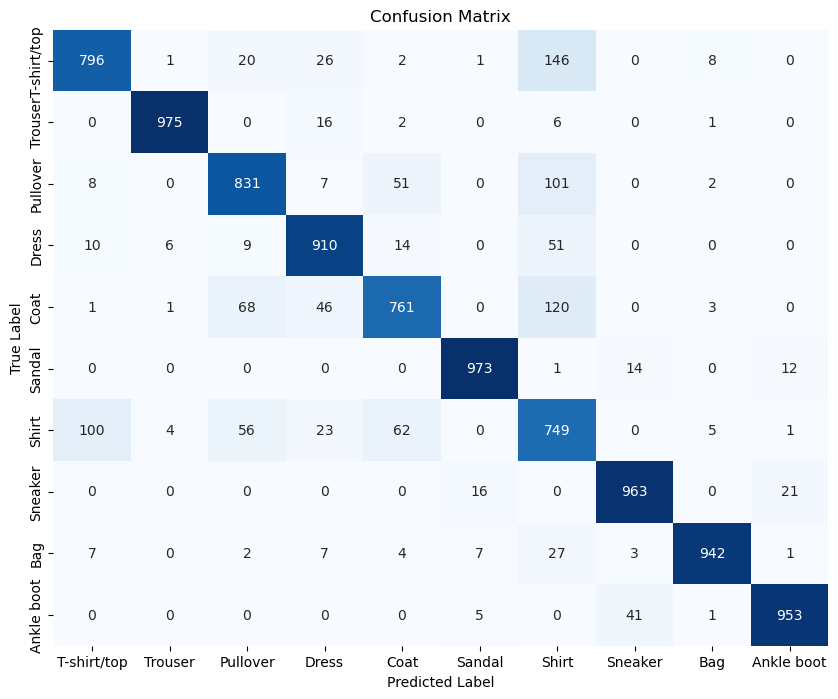

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming test_labels are the true labels and predictions are the model's output
# If predictions are probabilities (2D array), we use np.argmax() to get predicted classes
if len(predictions.shape) > 1:  # Check if predictions are probabilities
    predictions = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Define class labels for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
